# P2I7 - Le pendule double

**Projet mené par :** Lomenech Nathan, Gagou Mattéo, Roche Nathan, Mauclaire Alexis

<img src="pendule_double.gif" alt="Texte alternatif" style="width:400px;height:400px;">

## Table des matières : 

1. Présentation du système
    1. Schema et nomenclature
    2. Présentation du système d'équations  différentielles aux grands angles
    3. Présentation des approximations aux petits angles
    4. Energie totale du système
    5. Explication du fonctionnement de Newmark/Newton-Raphson
2. Résolution aux petits angles : 
    1. Implémentation de la solution analytique
    2. Implémentation d'une méthode de référence avec solve_ivp
    3. Implémentation méthode de Newmark/Newton-Raphson
    4. Comparaison des résultats
3. 4ésolution aux grands angles : 
    1. Implémentation méthode de Newmark/Newton-Raphson
    2. Implémentation d'une méthode de référence avec solve_ivp
    3. Comparaison des résultats
    4. To be continued
4. Comparaison petits/grands angles :
    1. Comparaison des méthodes 
    2. Détermination de l'angle critique
5. Exploitation des modèles : 
    1. Portrait de phase
    2. Calcul exposant lyapunov
    3. Analyse
6. Animations graphiques

# 1. Présentation du système

### Table des matières : 
1. Schema et nomenclature
2. Présentation du système d'équations  différentielles aux grands angles
3. Présentation des approximations aux petits angles
4. Solution analytique aux petits angles
5. Energie totale du système
6. Explication du fonctionnement de Newmark/Newton-Raphson



## 1.1 Schéma et nomenclature

#### On utilise le schéma suivant pour la nomenclature des angles et longeurs :
<img src="schema.png" alt="Texte alternatif" style="width:300px;height:300px;">

#### Les différentes variables aux petits angles: 
 - solution_ana_pa : **solution analytique aux petits angles**, array 2D avec [$\theta_1$,$\theta_2$, $\dot{\theta_1}$,$\dot{\theta_1}$]
 - solution_ivp_pa : **solution obtenu avec solve.ivp** array 2D avec [$\theta_1$, $\theta_2$,$\dot\theta_1$,$\dot{\theta_2}$]
 - solution_newmark_pa :  **solution obtenu avec l'algorithme de Newmark** array 2D avec [$\theta_1$,$\theta_2$, $\dot{\theta_1}$,$\dot{\theta_1}$]
 - x0 = [$\theta_{10}$,$\theta_{20}$,$\dot\theta_{10}$, $\dot\theta_{20}$]

#### Les différentes variables aux grands angles: 
 - solution_ivp_ga : **solution obtenu avec solve.ivp** array 2D avec [$\theta_1$, $\dot{\theta_1}$,$\theta_2$,$\dot{\theta_1}$]
 - solution_newmark_ga :  **solution obtenu avec l'algorithme de Newmark** array 2D avec [$\theta_1$,$\theta_2$, $\dot{\theta_1}$,$\dot{\theta_1}$]
- x0 = [$\theta_{10}$,$\theta_{20}$,$\dot\theta_{10}$, $\dot\theta_{20}$]


 **Nomenclature des fonctions/variables** :
 - _pa = petits angles
 - _ga = grands angles

## 1.2 Présentation du système d'équations  différentielles aux grands angles

#### Equations différentiels aux grands angles :

$\hspace{3cm} 
\begin{cases} 
(m_1 + m_2)l_1\ddot\theta_1 + m_2 l_2 \cos(\theta_1 - \theta_2)\ddot\theta_2 + m_2 l_2 \sin(\theta_1 - \theta_2)\theta_2^2 + (m_1 + m_2)g \sin\theta_1 = 0
\\ 
m_2 l_2 \ddot\theta_2 + m_2 l_1 \cos(\theta_1 - \theta_2)\ddot\theta_1 - m_2 l_1 \sin(\theta_1 - \theta_2)\theta_1^2 + m_2 g \sin\theta_2 = 0
\end{cases}$

## 1.3 Linéarisation aux petits angles

#### Système d'équattion différentielles aux petits angles : 

$\hspace{3cm} 
\begin{cases} 
l_1 \ddot{\theta_1} + (1 + \mu)g \theta_1 -\mu g \theta_2 = 0
\\ 
l_2 \ddot{\theta_2} - (1+\mu)g \theta_1 + (1+\mu)g \theta_2 = 0
\end{cases}$

avec $\mu = \frac{m_2}{m_1}$

## 1.4 Solution analytique aux petits angles

On a le système suivant :

$\hspace{3cm} 
\begin{cases} 
(m_1 + m_2)l_1^2 \ddot{\theta}_1 + m_2l_1l_2\ddot{\theta}_2 + (m_1 + m_2)gl_1\theta_1 = 0
\\ 
m_2l_1l_2\ddot{\theta}_2 + m_2l_2^2\ddot{\theta}_2 + m_2gl_2\theta_2 = 0
\end{cases}$


Nous allons utilisé la version suivante : 

$\hspace{3cm} 
\begin{cases} 
\ddot{\theta}_1 = \frac{\mu g\theta_2 - (1+\mu)g\theta_1}{l_1}
\\ 
\ddot{\theta}_2 = \frac{(1+\mu)g \theta_1 - (1+\mu)g\theta_2}{l_2}
\end{cases}$

Avec la solution analytique exacte : 

$\hspace{3cm} 
\begin{cases} 
\theta_1^{exact}(t) = C_1 \cos(\omega_1t + \phi_1) + C_2 \cos(\omega_2t + \phi_2)
\\
\theta_2^{exact}(t) = C_1 A_1 \cos(\omega_1t + \phi_1)+C_2 A_2 \cos(\omega_2 t + \phi_2)
\end{cases}$

avec : 

$$ \omega_{1,2}^2 = \frac{g(1+ \mu)(l_1+l_2) \pm g\sqrt{(1+\mu)^2(l_1+l_2)^2 - 4(1+\mu)l_1l_2}}{2l_1l_2} $$


## 1.5 Energie totale du système 

$\hspace{3cm} 
\begin{cases} 
E_{c1} = -m_1 g l_1 \cos\theta_1
\\ 
E_{c2} = \frac{1}{2}m_2(l_1^2\dot\theta_1^2 +l_2^2 \dot\theta_2^2 + 2l_1 l_2 \cos(\theta_1 - \theta_2)\dot\theta_1 \dot\theta_2 )
\\
E_{p1} = -m_1 g l_1 \cos\theta_1
\\
E_{p2} = -m_2 g (l_1 \cos\theta_1 + l_2\cos\theta_2)
\\
E_{tot} = E_{c1} + E_{c2} + E_{p1} + E_{p2}
\end{cases}$

## 1.6 Présentation du fonctionnement de Newmark/Newton-Raphson

#### Nomenclature : 
- X = arrray numpy 2D des positions angulaires en fonction du temps : X = [$\theta_1$,$\theta_2$]
- Xp = array numpy 2D des vitesses angulaires en fonction du temps : Xp =[$\dot\theta_1$,$\dot\theta_2$]
- Xp = array numpy 2D des accelerations angulaires en fonction du temps : Xpp =[$\ddot\theta_1$,$\ddot\theta_2$]
- precNR : précision de résolution du système d'équations différentielles à chaque pas de temps
- Pour les **Jacobiennes** :
    - Jx : matrice des dérivées partielles en fonction de $\theta_1$,$\theta_2$. Donc en fonction des positions angulaires
    - Jxp : matrice des dérivées partielles en fonction de $\dot\theta_1$,$\dot\theta_2$. Donc en fonction des vitesses angulaires
    - Jxpp = C : matrice des dérivées partielles en fonction de $\ddot\theta_1$,$\ddot\theta_2$. Donc en fonction des accélérations angulaires

#### Initialisation des variables en fonction des CI :
Avant de rentrer dans la boucle, on initialise les variables de position et d'acceleration dans les arrays X et Xp en fonction des conditions initiales renseignées dans l'appel de la fonction.

#### Résolution de l'acceleration à t=0 : 
Afin de pouvoir continuer la résolution du modéle, il faut d'abord caractériser totalement le système à t=0. Il faut donc calculer le vecteur accélération Xpp à t=0 (Xpp[:,0]). Pour cela, on initialise les deux matrices A et B qui correspondent à ....

#### Boucle temporel :
##### Prédiction des positions/vitesses/accélérations angulaires :
On essaye de prévoir les positions/vitesses/accélérations angulaires au pas de temps t+1 pour avoir une base de départ pour affiner ces valeurs par la suite : 

$\hspace{3cm} 
\begin{cases} 
X_{t+1} = X_t + Xp_t dt + \frac{1}{2}Xpp_t dt^2
\\ 
Xp_{t+1} = Xp_t + Xpp_t dt
\\
Xpp_{t+1} = Xpp_t
\end{cases}$

##### Calcul du résidu de la prédition :
Afin d'estimer l'erreur faite dans la première prédiction, on calcul le résidu associé aux valeurs prédites. Pour cela, on réinjecte ces valeurs dans le système d'équations différentielles (qui est censé valoir 0 à t+1) et on calcul le résidu associé.

##### Boucle afin de satisfaire la condition sur le résidu : 
On va essayer d'afiner la prédiction pour satisfaire la condition de précision définie plus tôt (precNR). On oublie pas de mettre en place un garde fou afin de ne pas itérrer à l'infini. 
Pour affiner la prédiction, on va itérré plusieurs fois la méthode de Newton-Raphson adapté aux équations différentiels dont le résultat ajouté aux valeurs précédentes sera pondéré par le résidu précédent.

Afin d'apater la méthod de Newton-Raphon aux équations différentiels, on calcul des jacobiennes Jx, Jxp, Jxpp (voir nomenclature) que l'on va ensuite combiner en les pondérants en fonction de dt afin d'obtenir une jacobienne du système différentiel. On met ensuite à jour les valeurs de positions/vitesses/accélérations angulaires et on recalcul le résidu avec ces dernières.

Ce programme va donc boucler pour chaque pas de temps jusqu'a satisfaire la condition de précision precNR.

# 2. Résolution aux petits angles

### Table des matières : 
1. Implémentation de la solution analytique
2. Implémentation d'une méthode de référence avec solve_ivp
3. Implémentation méthode de Newmark/Newton-Raphson
4. Comparaison des résultats

#### Importations :

In [371]:
import math 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import  matplotlib.animation as animation
from numpy.linalg import inv, norm
from matplotlib.pyplot import figure, gca, xlim, show
from scipy.integrate import solve_ivp
import seaborn as sns
import matplotlib.colors as mcolors


### 2.1 Implémentation solution analytique

In [214]:
def methode_analytique_pa(m1, m2, l1, l2, g, x0, dt, Ninc):
    mu = m2/m1
    theta10,theta20, omega10, omega20 = x0
    
    #création des variables
    solution_ana = np.zeros((4,Ninc))

    #cacul des constantes
    omega1_carre = (g*(1+mu)*(l1+l2) + g*np.sqrt((1+mu)**2*(l1+l2)**2 - 4*(1+mu)*l1*l2))/(2*l1*l2)
    omega2_carre = (g*(1+mu)*(l1+l2) - g*np.sqrt((1+mu)**2*(l1+l2)**2 - 4*(1+mu)*l1*l2))/(2*l1*l2)
        
    A1 = (1+mu)/mu - l1/(mu*g)*omega1_carre
    A2 = (1+mu)/mu - l1/(mu*g)*omega2_carre

    C1 = (theta20 - A2*theta10)/(A1-A2)
    C2 = (A1*theta10 - theta20)/(A1-A2)

    phi1 = np.arcsin((omega20-A2*omega10)/(C1*np.sqrt(omega1_carre)*(A2-A1)))
    phi2 = np.arcsin((A1*omega10-omega20)/(C2*np.sqrt(omega2_carre)*(A2-A1)))


    for t in range(Ninc):
        solution_ana[0,t] = C1*np.cos(np.sqrt(omega1_carre)*t*dt + phi1) + C2*np.cos(np.sqrt(omega2_carre)*t*dt + phi2)
        solution_ana[1,t] = C1*A1*np.cos(np.sqrt(omega1_carre)*t*dt + phi1) + C2*A2*np.cos(np.sqrt(omega2_carre)*t*dt + phi2)

    #CALCUL des dérivées temporelles : 
    for j in range(Ninc):
        
        if j == 0 :
            #calcul pour omega1
            solution_ana[2,j] = (-3*solution_ana[0,j] + 4*solution_ana[0, j+1] - solution_ana[0,j+2])/(2*dt)
            #calcul pour omega2
            solution_ana[3,j] = (-3*solution_ana[1,j] + 4*solution_ana[1, j+1] - solution_ana[1,j+2])/(2*dt)
        
        elif j == Ninc-1 :
            #calcul pour omega1
            solution_ana[2,j] = (3*solution_ana[0,j] - 4*solution_ana[0, j-1] + solution_ana[0,j-2])/(2*dt)
            #calcul pour omega2
            solution_ana[3,j] = (3*solution_ana[1,j] - 4*solution_ana[1, j-1] + solution_ana[1,j-2])/(2*dt)    
        
        else:
            #calcul pour omega1
            solution_ana[2,j] = (solution_ana[0,j+1] - solution_ana[0, j-1])/(2*dt)
            #calcul pour omega2
            solution_ana[3,j] = (solution_ana[1,j+1] - solution_ana[1, j-1] )/(2*dt)    

    return solution_ana

### 2.2 Implémentation d'une méthode de référence avec solve_ivp

In [215]:
def pendule_double_ivp_pa(t, X, l1, l2, g,mu):
    theta1, theta2, omega1, omega2 = X
    
    dtheta1dt = omega1
    domega1dt = (mu*g*theta2 - (1+mu)*g*theta1)/l1
    dtheta2dt = omega2
    domega2dt = ((1+mu)*g*theta1 - (1 + mu)*g*theta2)/l2
    
    
    return [dtheta1dt, dtheta2dt, domega1dt, domega2dt]

### 2.3 Implémentation méthode de Newmark/Newton-Raphson aux petits angles

A modifier pour avoir l'expréssion aux petits angles

In [242]:
def NewmarkNewtonRaphson_pa(m1, m2, L1, L2, g, x0, dt, nbPasTemps):
    # Précision sur la solution de Newton-Raphson
    precNR = 1.e-5

    # Initialisation des matrices de position, vitesse, accélération
    X = np.zeros((2, nbPasTemps))
    Xp = np.zeros((2, nbPasTemps))
    Xpp = np.zeros((2, nbPasTemps))
    X[:, 0] = x0[0],x0[1]
    Xp[:, 0] = x0[2],x0[3]

    # On résout le système au temps t=0 pour obtenir l'accélération initiale
    deltaTheta = x0[0] - x0[1]
    M = m1 + m2
    A = np.array([[M*L1**2, m2*L1*L2], [m2*L1*L2, m2*L2**2]])
    B = np.array([-M*g*L1*x0[0],-m2*g*L2*x0[1]])
    Xpp0 = np.linalg.solve(A, B)
    Xpp[:, 0] = Xpp0

    # Matrice C des coefficients devant les termes d'accélération
    # Tous les autres termes des équations non-linéaires sont compris dans Fnl
    C = np.array([[M*L1**2, m2*L1*L2], [m2*L1*L2, m2*L2**2]])

    pourcent = 0
    for n in range(nbPasTemps-1):
        # Prédiction : on calcule les inconnues au rang n+1
        X[:, n+1] = X[:, n] + dt*Xp[:, n] + (dt**2/2)*Xpp[:, n]
        Xp[:, n+1] = Xp[:, n] + dt*Xpp[:, n]
        Xpp[:, n+1] = Xpp[:, n]

        # Calcul du résidu censé être nul au rang n+1
        deltaTheta = X[0, n+1] - X[1, n+1]
        Fnl = np.zeros(2)
        Fnl[0] =  M*g*L1*X[0, n+1]
        Fnl[1] = m2*g*L2*X[1, n+1]
        residu = -np.dot(C, Xpp[:, n+1]) - Fnl
        residu_relatif = 1

        # Itérations de Newton-Raphson sur les inconnues au rang n+1 jusqu'à ce que le résidu soit nul
        nbIter = 0
        while np.linalg.norm(residu_relatif) > precNR and nbIter <= 1e3:
            nbIter += 1

            # Calcul de la Jacobienne
            deltaTheta = X[0, n+1] - X[1, n+1]
            Jx = np.zeros((2, 2))
            Jx[0, 0] = M*g*L1
            Jx[0, 1] = 0
            Jx[1, 0] = 0
            Jx[1, 1] = m2*g*L2

            Jxp = np.zeros((2, 2))
            Jxp[0, 1] = 0
            Jxp[1, 0] = 0

            J = (4/dt**2)*C + (2/dt)*Jxp + Jx

            # Calcul des inconnues corrigées
            deltaX = np.linalg.solve(J, residu)
            X[:, n+1] += deltaX
            Xp[:, n+1] += (2/dt)*deltaX
            Xpp[:, n+1] += (4/dt**2)*deltaX

            # Re-calcul du résidu censé valoir 0
            deltaTheta = X[0, n+1] - X[1, n+1]
            Fnl[0] =  M*g*L1*X[0, n+1]
            Fnl[1] = m2*g*L2*X[1, n+1]
            residu = -np.dot(C, Xpp[:, n+1]) - Fnl
            residu_relatif = np.linalg.norm(deltaX)/np.linalg.norm(X)



    return np.array([X[0,:],X[1,:],Xp[0,:],Xp[1,:]])

### 2.4 Comparaison des résultats

#### Définition des conditions initiales aux petits angles

In [243]:
theta10 = np.radians(5)                            #theta 1 initial (rad)
theta20 = np.radians(5)                            #theta 2 initial (rad)
omega10 = np.radians(0)                              #omega 1 initial (rad/s)
omega20 = np.radians(0)                            #omega 2 initial (rad/s)
l1 = 3                                #longeur du premier bras (m)
l2 = 2                                #longeur du deuxième bras (m)
g = 9.81                                #Acceleration terrestre (m.s^-2)
tf = 100                                 #temps de la simulation (s)
dt = 0.01                               #Pas temporel (s)
Ninc = int(tf/dt)                       #nombre d'itération
m1 = 2
m2 = 3
mu = m2/m1

t0 = 0
x0 = np.array([theta10,theta20, omega10, omega20]) 
t_balayage = np.linspace(t0, tf, Ninc)  #avec t_balayage2 = np.arange(t0, tf, dt) on n'atteint pas tf .. 

#### Résolution des différentes méthodes

In [250]:
#solution analytique : 
solution_ana_pa = methode_analytique_pa(m1,m2,l1,l2,g,x0,dt,Ninc)

#solution solve ivp :
solution_ivp_pa_bis=solve_ivp(pendule_double_ivp_pa, [t0,tf], x0, method='RK45', args = (l1, l2, g, mu), t_eval=t_balayage, rtol=1e-6, atol=1e-6)
solution_ivp_pa=np.array([solution_ivp_pa_bis.y[0], solution_ivp_pa_bis.y[1], solution_ivp_pa_bis.y[2], solution_ivp_pa_bis.y[3]])

#solution Newmark :
solution_newmark_pa = NewmarkNewtonRaphson_pa(m1, m2, l1, l2, g, x0, dt, Ninc)

#### Variation des angles $\theta_1$ et $\theta_2$ au cours du temps

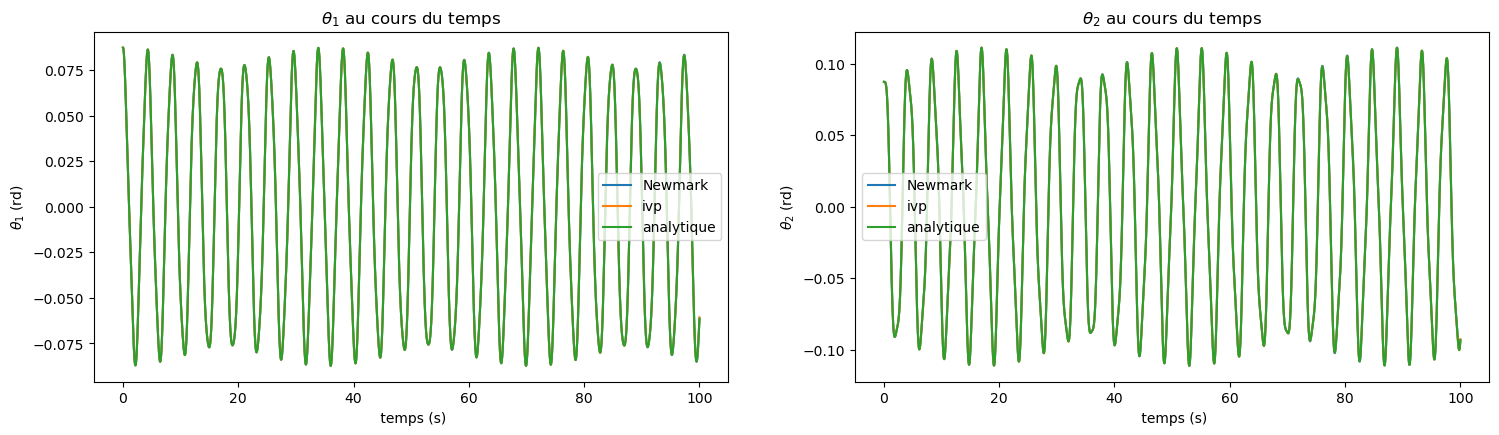

In [251]:
fig = plt.figure(figsize=(18, 10));

ax = fig.add_subplot(2,2,1)
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \theta_1 $ (rd)')
ax.plot(t_balayage,solution_newmark_pa[0,:], label = 'Newmark')
ax.plot(t_balayage,solution_ivp_pa[0,:], label = 'ivp')
ax.plot(t_balayage,solution_ana_pa[0,:], label = 'analytique')
ax.set_title(r'$\theta_1$ au cours du temps')
plt.legend()

bx = fig.add_subplot(2,2,2)
bx.set_xlabel(' temps (s)')
bx.set_ylabel(r'$ \theta_2 $ (rd)')
bx.plot(t_balayage,solution_newmark_pa[1,:], label = 'Newmark')
bx.plot(t_balayage,solution_ivp_pa[1,:], label = 'ivp')
bx.plot(t_balayage,solution_ana_pa[1,:], label = 'analytique')
bx.set_title(r'$\theta_2$ au cours du temps')
plt.legend()

#### Ecart "relatif" à la solution anlytique

Afin de ne pas diviser par des valeurs proches de zero, la formule utilisé pour calculer l'écart "relatif" à chaque pas de temps est la suivante : 
$$\delta = \frac{newmark/ivp(t)-ana(t)}{max(ana)} $$ 
avec $max(ana)$ le maximum de la valeur analytique sur la période [0,tf]

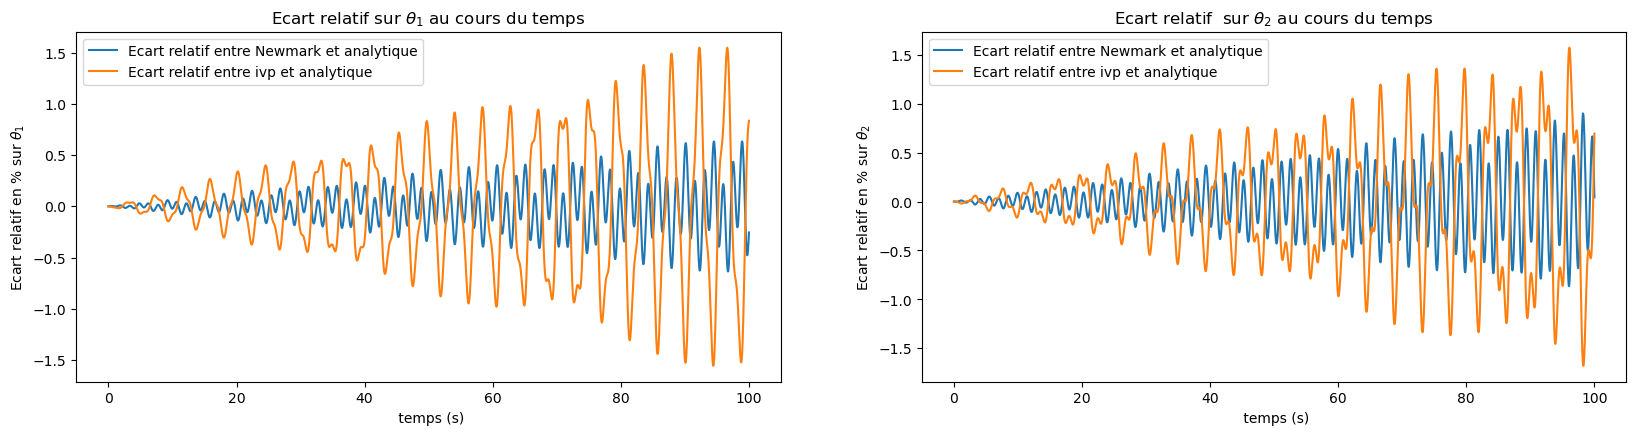

In [252]:
ecart_relatif_newmark_1 = (solution_newmark_pa[0,:]-solution_ana_pa[0,:])/(np.max(solution_ana_pa[0,:])) *100
ecart_relatif_newmark_2 = (solution_newmark_pa[1,:]-solution_ana_pa[1,:])/(np.max(solution_ana_pa[1,:])) *100
ecart_relatif_ivp_1 = (solution_ivp_pa[0,:]-solution_ana_pa[0,:])/(np.max(solution_ana_pa[0,:])) *100
ecart_relatif_ivp_2 = (solution_ivp_pa[1,:]-solution_ana_pa[1,:])/(np.max(solution_ana_pa[1,:])) *100


fig = plt.figure(figsize=(20, 10));

ax = fig.add_subplot(2,2,1);
ax.plot(t_balayage,ecart_relatif_newmark_1, label = 'Ecart relatif entre Newmark et analytique')
ax.plot(t_balayage,ecart_relatif_ivp_1, label = 'Ecart relatif entre ivp et analytique')
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'Ecart relatif en % sur $\theta_1$')
ax.set_title(r'Ecart relatif sur $\theta_1$ au cours du temps')
plt.legend()

bx = fig.add_subplot(2,2,2);
bx.plot(t_balayage,ecart_relatif_newmark_2, label = 'Ecart relatif entre Newmark et analytique')
bx.plot(t_balayage,ecart_relatif_ivp_2, label = 'Ecart relatif entre ivp et analytique')
bx.set_xlabel(' temps (s)')
bx.set_ylabel(r'Ecart relatif en % sur $\theta_2$')
bx.set_title(r'Ecart relatif  sur $\theta_2$ au cours du temps')
plt.legend()

#### Diagrammes de phases des différente méthodes

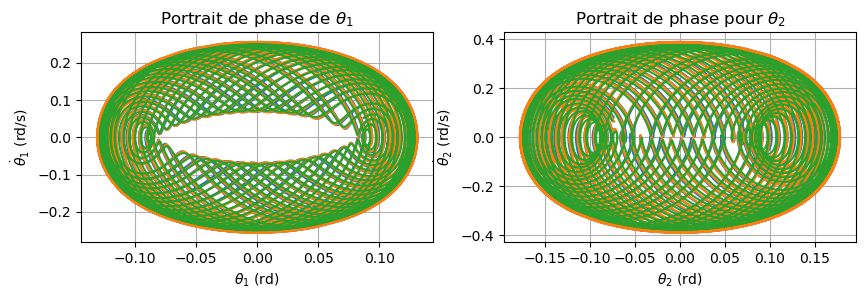

In [227]:
fig = plt.figure(figsize=(10, 6));

ax = fig.add_subplot(2,2,1);
ax.plot(solution_newmark_pa[0],solution_newmark_pa[2])
ax.plot(solution_ivp_pa[0],solution_ivp_pa[2])
ax.plot(solution_ana_pa[0],solution_ana_pa[2])
ax.set_xlabel(r'$\theta_1$ (rd)')
ax.set_ylabel(r'$ \dot\theta_1 $ (rd/s)')
ax.set_title(r'Portrait de phase de $\theta_1$')
ax.grid(True, which='both')

bx = fig.add_subplot(2,2,2);
bx.set_xlabel(r'$ \theta_2 $ (rd)')
bx.set_ylabel(r'$ \dot\theta_2 $ (rd/s)')
bx.set_title(r'Portrait de phase pour $\theta_2$')
bx.plot(solution_newmark_pa[1],solution_newmark_pa[3])
bx.plot(solution_ivp_pa[1],solution_ivp_pa[3])
bx.plot(solution_ana_pa[1],solution_ana_pa[3])
bx.grid(True, which='both')


#### Energie totale

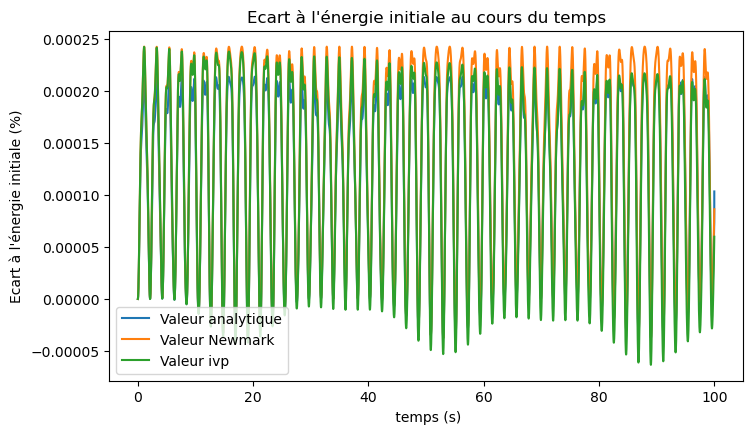

In [254]:
def energie_totale(solution,m1,m2,l1,l2,g):
    Ec1 = 0.5*m1*l1**2*solution[2,:]**2
    Ec2 = 0.5*m2*(l1**2*solution[2,:]**2 + l2**2*solution[3,:]**2 + 2*l1*l2*np.cos(solution[0,:]-solution[1,:])*solution[2,:]*solution[3,:])
    Ep1 = -m1*g*l1*np.cos(solution[0,:])
    Ep2 = -m2*g*(l1*np.cos(solution[0,:]) + l2*np.cos(solution[1,:]))
    # E_ini = m1*g*l1*np.cos(solution[0,0]) + m2*g*(l1*np.cos(solution[0,0]) + l2*np.cos(solution[1,0])) #ordonnée à l'origine = 0
    Etot = Ec1 + Ec2 + Ep1 + Ep2 # + E_ini
    return Etot


def energie_totale_relatif(solution,m1,m2,l1,l2,g):
    Etot = energie_totale(solution,m1,m2,l1,l2,g)
    Ninc = len(Etot)
    Etot_relatif = np.zeros(Ninc)
    Etot_ini = Etot[0]

    Etot_relatif = (1-Etot/Etot_ini)*100

    return Etot_relatif
        
        
#Calcul Etot_ana_pa : 
Etot_ana_pa = energie_totale_relatif(solution_ana_pa,m1,m2,l1,l2,g)

#Calcul Etot_newmark_pa :
Etot_newmark_pa = energie_totale_relatif(solution_newmark_pa,m1,m2,l1,l2,g)

#Calcul Etot_ivp_pa :
Etot_ivp_pa = energie_totale_relatif(solution_ivp_pa,m1,m2,l1,l2,g)


fig = plt.figure(figsize=(18, 10));

ax = fig.add_subplot(2,2,1);
ax.plot(t_balayage,Etot_ana_pa, label = 'Valeur analytique')
ax.plot(t_balayage,Etot_newmark_pa, label = 'Valeur Newmark')
ax.plot(t_balayage,Etot_ivp_pa, label = 'Valeur ivp')
ax.set_xlabel(' temps (s)')
ax.set_ylabel("Ecart à l'énergie initiale (%)")
ax.set_title("Ecart à l'énergie initiale au cours du temps")
plt.legend()

#### Analyse des résultats aux petits angles :
Avec les graphiques precedents, on peut voir que la méthode de Newmark est plus proche de la solution analytique que la méthode utilisant solve_ivp, montrant l'intéret d'implémenter cette dernière.

## 3. Résolution aux grands angles 

### Table des matières : 
1. Implémentation méthode de Newmark/Newton-Raphson
2. Implémentation d'une méthode de référence avec solve_ivp
3. Comparaison des résultats

### 3.1 Implémentation méthode de Newmark/Newton-Raphson :

In [383]:
def NewmarkNewtonRaphson_ga(m1, m2, L1, L2, g,x0,dt, nbPasTemps):
    # Précision sur la solution de Newton-Raphson
    precNR = 1.e-9

    # Initialisation des matrices de position, vitesse, accélération
    X = np.zeros((2, nbPasTemps))
    Xp = np.zeros((2, nbPasTemps))
    Xpp = np.zeros((2, nbPasTemps))
    X[:, 0] = x0[0], x0[1]
    Xp[:, 0] = x0[2], x0[3]

    # On résout le système au temps t=0 pour obtenir l'accélération initiale
    deltaTheta = x0[0] - x0[1]
    M = m1 + m2
    A = np.array([[M*L1, m2*L2*np.cos(deltaTheta)], [m2*L1*np.cos(deltaTheta), m2*L2]])
    B = np.array([-m2*L2*np.sin(deltaTheta)*x0[3]**2 - M*g*np.sin(x0[0]),
                  m2*L1*np.sin(deltaTheta)*x0[2]**2 - m2*g*np.sin(x0[1])])
    Xpp0 = np.linalg.solve(A, B)
    Xpp[:, 0] = Xpp0

    # Matrice C des coefficients devant les termes d'accélération
    # Tous les autres termes des équations non-linéaires sont compris dans Fnl
    C = np.array([[M*L1, m2*l2*np.cos(deltaTheta)], [m2*l1*np.cos(deltaTheta), m2*L2]])

    pourcent = 0
    for n in range(nbPasTemps-1):
        # Prédiction : on calcule les inconnues au rang n+1
        X[:, n+1] = X[:, n] + dt*Xp[:, n] + (dt**2/2)*Xpp[:, n]
        Xp[:, n+1] = Xp[:, n] + dt*Xpp[:, n]
        Xpp[:, n+1] = Xpp[:, n]

        # Calcul du résidu censé être nul au rang n+1
        deltaTheta = X[0, n+1] - X[1, n+1]
        Fnl = np.zeros(2)
        Fnl[0] = m2*L2*np.sin(deltaTheta)*Xp[1, n+1]**2 + M*g*np.sin(X[0, n+1])
        Fnl[1] = -m2*L1*np.sin(deltaTheta)*Xp[0, n+1]**2 + m2*g*np.sin(X[1, n+1])
        residu = -np.dot(C, Xpp[:, n+1]) - Fnl
        residu_relatif = 1

        # Itérations de Newton-Raphson sur les inconnues au rang n+1 jusqu'à ce que le résidu soit nul
        nbIter = 0
        while np.linalg.norm(residu_relatif) > precNR and nbIter <= 1e3:
            nbIter += 1

            # Calcul de la Jacobienne
            deltaTheta = X[0, n+1] - X[1, n+1]
            Jx = np.zeros((2, 2))
            Jx[0, 0] = M*g*np.cos(X[0, n+1]) + m2*L2*(np.cos(deltaTheta)*Xp[1, n+1]**2 - np.sin(deltaTheta)*Xpp[1, n+1])
            Jx[0, 1] = m2*L2*(np.sin(deltaTheta)*Xpp[1, n+1] - np.cos(deltaTheta)*Xp[1, n+1]**2)
            Jx[1, 0] = -m2*L1*(np.sin(deltaTheta)*Xpp[0, n+1] - np.cos(deltaTheta)*Xp[0, n+1]**2)
            Jx[1, 1] = m2*L1*(np.sin(deltaTheta)*Xpp[0, n+1] + np.cos(deltaTheta)*Xp[0, n+1]**2) + m2*g*np.cos(X[1, n+1])

            Jxp = np.zeros((2, 2))
            Jxp[0, 1] = 2*m2*L2*np.sin(deltaTheta)*Xp[1, n+1]
            Jxp[1, 0] = -2*m2*L1*np.sin(deltaTheta)*Xp[0, n+1]
            
            Jxpp = np.zeros((2, 2))
            Jxpp = np.array([[M*L1, m2*l2*np.cos(deltaTheta)], [m2*l1*np.cos(deltaTheta), m2*L2]])


            J = (4/dt**2)*Jxpp + (2/dt)*Jxp + Jx

            # Calcul des inconnues corrigées
            deltaX = np.linalg.solve(J, residu)
            X[:, n+1] += deltaX
            Xp[:, n+1] += (2/dt)*deltaX
            Xpp[:, n+1] += (4/dt**2)*deltaX

            # Re-calcul du résidu censé valoir 0
            deltaTheta = X[0, n+1] - X[1, n+1]
            Fnl[0] = m2*L2*np.sin(deltaTheta)*Xp[1, n+1]**2 + M*g*np.sin(X[0, n+1])
            Fnl[1] = - m2*L1*np.sin(deltaTheta)*Xp[0, n+1]**2 + m2*g*np.sin(X[1, n+1])
            residu = -np.dot(Jxpp, Xpp[:, n+1]) - Fnl
            residu_relatif = np.linalg.norm(deltaX)/np.linalg.norm(X)



    return np.array([X[0,:],X[1,:],Xp[0,:],Xp[1,:]])

### 3.2 Implémentation de la méthode solve_ivp

In [384]:
def pendule_double_ivp_ga(t, X, l1, l2, g,m1,m2):
    theta1, theta2, omega1, omega2 = X
    deltatheta = theta1 - theta2
    
    dtheta1dt = omega1
    domega1dt = (-m2*l1*np.cos(deltatheta)*np.sin(deltatheta)*omega1**2-m2*l1*np.sin(deltatheta)*omega2**2-m1*g*np.sin(theta1)-m2*g*np.sin(deltatheta)*np.cos(theta2))/(m1*l1+m2*l1*np.sin(deltatheta)**2)
    dtheta2dt = omega2
    domega2dt = ((m1+m2)*l1*np.sin(deltatheta)*omega1**2+m2*l2*np.cos(deltatheta)*np.sin(deltatheta)*omega2**2+(m1+m2)*g*np.sin(deltatheta)*np.cos(theta1))/(m1*l2+m2*l2*np.sin(deltatheta)**2)
    
    return [dtheta1dt, dtheta2dt, domega1dt, domega2dt]

### 3.3 Comparaison des résultats

#### Définition des conditions intiales aux grands angles

In [385]:
theta10 = np.radians(25)                            #theta 1 initial (rad)
theta20 = np.radians(-25)                            #theta 2 initial (rad)
omega10 = np.radians(0)                              #omega 1 initial (rad/s)
omega20 = np.radians(0)                            #omega 2 initial (rad/s)
l1 = 3                                #longeur du premier bras (m)
l2 = 2                                #longeur du deuxième bras (m)
g = 9.81                                #Acceleration terrestre (m.s^-2)
tf = 100                                 #temps de la simulation (s)
dt = 0.005                              #Pas temporel (s)
Ninc = int(tf/dt)                       #nombre d'itération
m1 = 2
m2 = 3
mu = m2/m1

t0 = 0
x0 = np.array([theta10,theta20, omega10, omega20]) 
t_balayage = np.linspace(t0, tf, Ninc)  #avec t_balayage2 = np.arange(t0, tf, dt) on n'atteint pas tf .. 

#### Résolution des différentes méthodes

In [386]:
#solution solve ivp :
solution_ivp_ga_bis=solve_ivp(pendule_double_ivp_ga, [t0,tf], x0, method='RK45', args = (l1, l2, g, m1,m2), t_eval=t_balayage, rtol=1e-9, atol=1e-9)
solution_ivp_ga=np.array([solution_ivp_ga_bis.y[0], solution_ivp_ga_bis.y[1], solution_ivp_ga_bis.y[2], solution_ivp_ga_bis.y[3]])

#solution Newmark :
solution_newmark_ga = NewmarkNewtonRaphson_ga(m1,m2,l1,l2,g,x0,dt,Ninc)


#### Variation des angles $\theta_1$ et $\theta_2$ au cours du temps

Text(0.5, 1.0, '$\\theta_2$ au cours du temps')

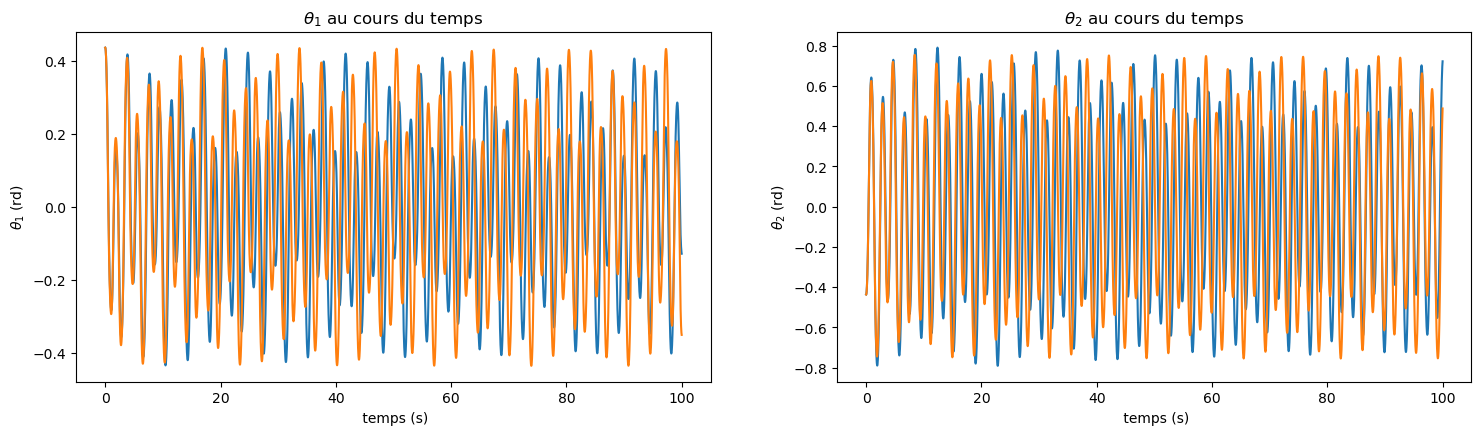

In [387]:
fig = plt.figure(figsize=(18, 10));

ax = fig.add_subplot(2,2,1)
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \theta_1 $ (rd)')
ax.plot(t_balayage,solution_newmark_ga[0,:], label = 'Newmark')
ax.plot(t_balayage,solution_ivp_ga[0,:], label = 'ivp')
ax.set_title(r'$\theta_1$ au cours du temps')


bx = fig.add_subplot(2,2,2)
bx.set_xlabel(' temps (s)')
bx.set_ylabel(r'$ \theta_2 $ (rd)')
bx.plot(t_balayage,solution_newmark_ga[1,:], label = 'Newmark')
bx.plot(t_balayage,solution_ivp_ga[1,:], label = 'ivp')
bx.set_title(r'$\theta_2$ au cours du temps')

#### Ecart "relatif" entre les solution


Afin de ne pas diviser par des valeurs proches de zero, la formule utilisé pour calculer l'écart "relatif" à chaque pas de temps est la suivante : 
$$\delta = \frac{newmark(t)-ivp(t)}{max(ivp)} $$ 
avec $max(ivp)$ le maximum de la valeur analytique sur la période [0,tf]

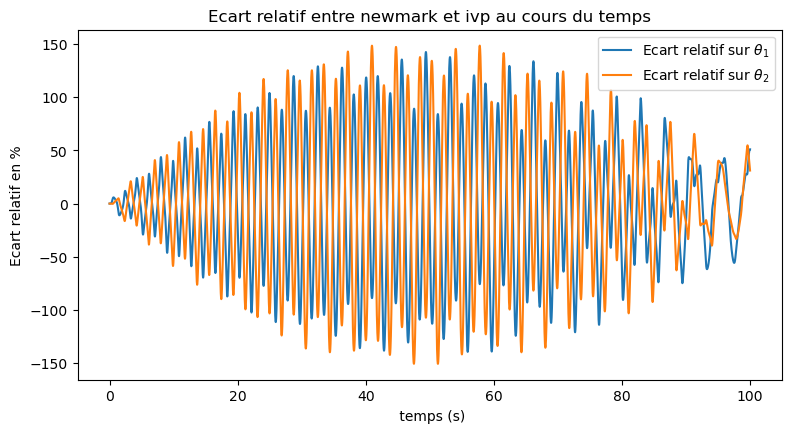

In [388]:
ecart_relatif_ga_1 = (solution_newmark_ga[0,:] - solution_ivp_ga[0,:])/np.max(solution_ivp_ga[0,:]) *100
ecart_relatif_ga_2 = (solution_newmark_ga[1,:] - solution_ivp_ga[1,:])/np.max(solution_ivp_ga[1,:]) *100

fig = plt.figure(figsize=(20, 10));

ax = fig.add_subplot(2,2,1);
ax.plot(t_balayage,ecart_relatif_ga_1, label = r'Ecart relatif sur $\theta_1$');
ax.plot(t_balayage,ecart_relatif_ga_2, label = r'Ecart relatif sur $\theta_2$');
ax.set_xlabel(' temps (s)')
ax.set_ylabel('Ecart relatif en %')
ax.set_title('Ecart relatif entre newmark et ivp au cours du temps')
plt.legend()



#### Calcul de l'énergie totale du système

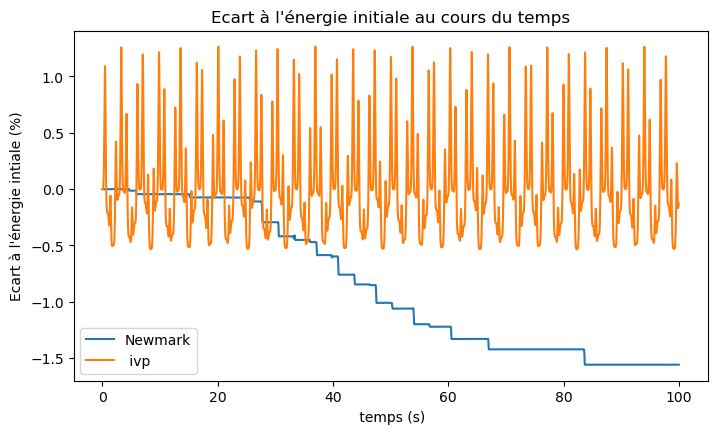

In [389]:
#La fonction calculant l'énergie totale du système se trouve dans la partie 1.5 (energie totale aux petits angles)

#Calcul Etot_newmark_pa :
Etot_newmark_ga = energie_totale_relatif(solution_newmark_ga,m1,m2,l1,l2,g)

#Calcul Etot_ivp_pa :
Etot_ivp_ga = energie_totale_relatif(solution_ivp_ga,m1,m2,l1,l2,g)


fig = plt.figure(figsize=(18, 10));

ax = fig.add_subplot(2,2,1);
ax.plot(t_balayage,Etot_newmark_ga, label = 'Newmark')
ax.plot(t_balayage,Etot_ivp_ga, label = ' ivp')
ax.set_xlabel(' temps (s)')
ax.set_ylabel("Ecart à l'énergie intiale (%)")
ax.set_title("Ecart à l'énergie initiale au cours du temps")
plt.legend()

#### Portraits de phase aux grand angles

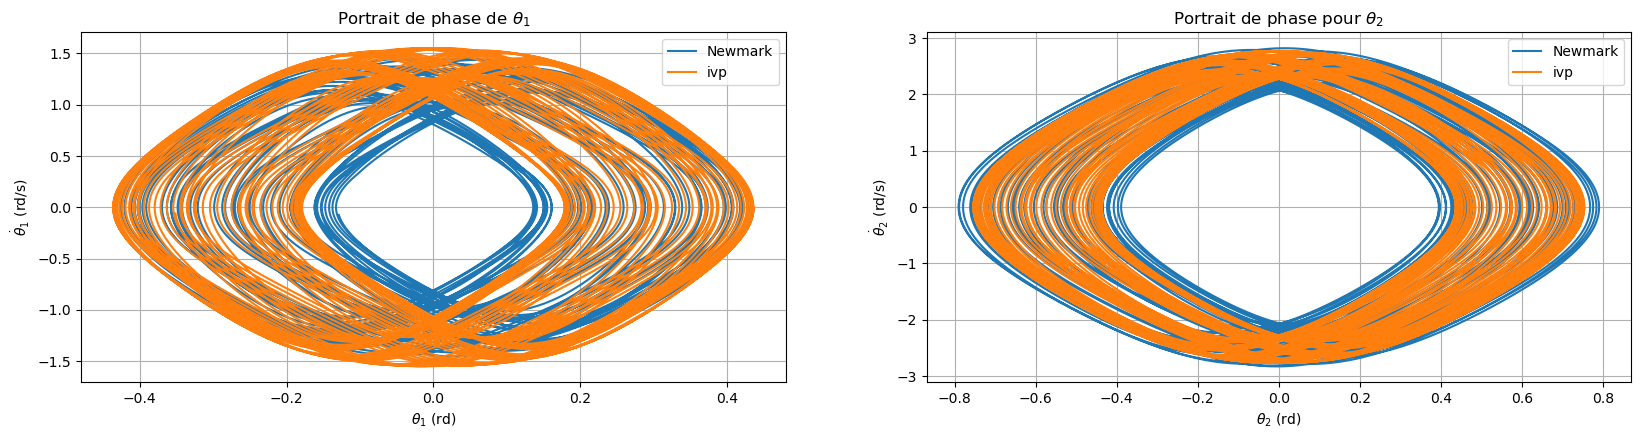

In [352]:
fig = plt.figure(figsize=(20, 10));

ax = fig.add_subplot(2,2,1);
ax.plot(solution_newmark_ga[0],solution_newmark_ga[2], label = 'Newmark')
ax.plot(solution_ivp_ga[0],solution_ivp_ga[2], label = 'ivp')

ax.set_xlabel(r'$\theta_1$ (rd)')
ax.set_ylabel(r'$ \dot\theta_1 $ (rd/s)')
ax.set_title(r'Portrait de phase de $\theta_1$')
ax.grid(True, which='both')
plt.legend()

bx = fig.add_subplot(2,2,2);
bx.set_xlabel(r'$ \theta_2 $ (rd)')
bx.set_ylabel(r'$ \dot\theta_2 $ (rd/s)')
bx.set_title(r'Portrait de phase pour $\theta_2$')
bx.plot(solution_newmark_ga[1],solution_newmark_ga[3], label = 'Newmark')
bx.plot(solution_ivp_ga[1],solution_ivp_ga[3], label = 'ivp')
bx.grid(True, which='both')
plt.legend()


#### Section de poincarré

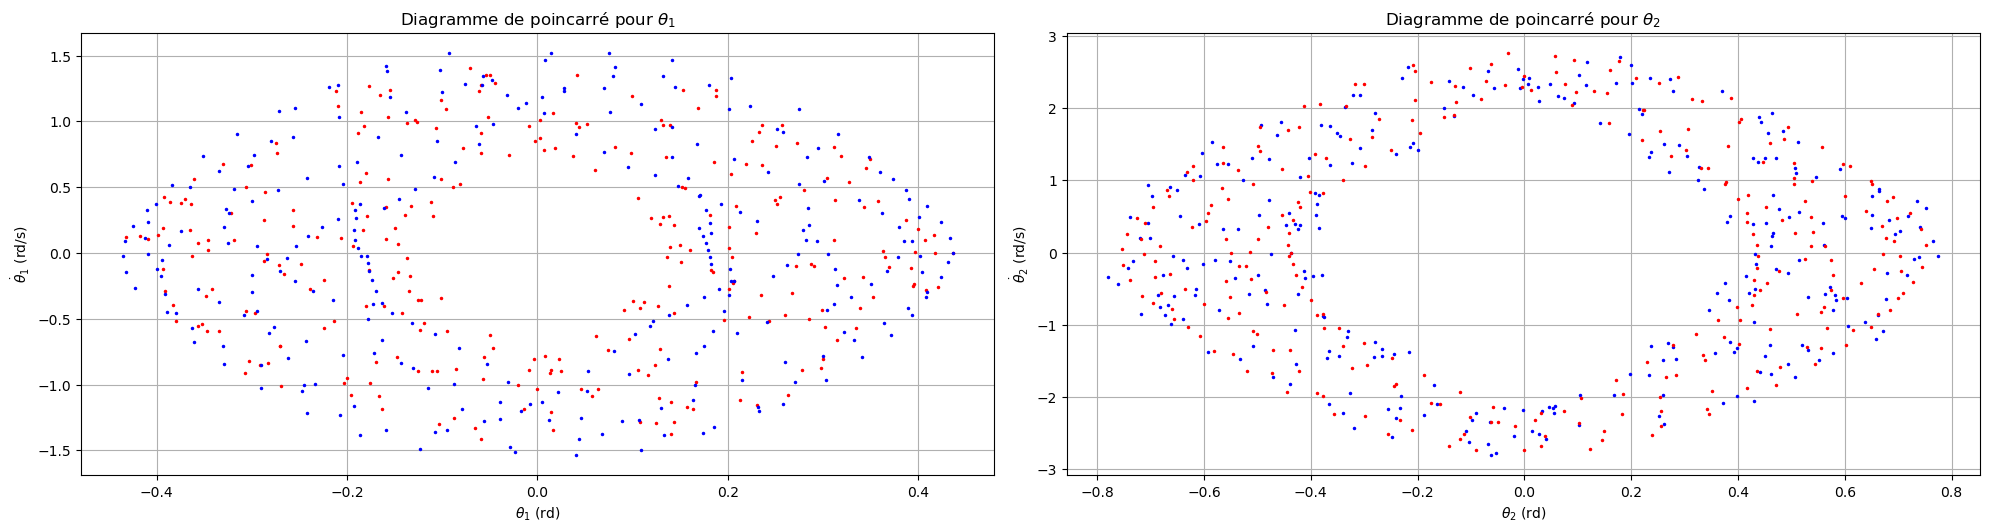

In [359]:
# Paramètres pour les sections de Poincaré
Na = 0  # Index de début
NT = Ninc  # Index de fin
Ni = 70  # Intervalle de points à prendre

solution_newmark_ga_p = solution_newmark_ga[:,Na:NT:Ni]
solution_ivp_ga_p = solution_ivp_ga[:,Na:NT:Ni]

fig = plt.figure(figsize=(20, 10));

ax = fig.add_subplot(2,2,1);
ax.plot(solution_newmark_ga_p[0,:],solution_newmark_ga_p[2,:], '.r', ms=3)
ax.plot(solution_ivp_ga_p[0,:],solution_ivp_ga_p[2,:], '.b', ms=3)
ax.set_xlabel(r'$\theta_1$ (rd)')
ax.set_ylabel(r'$ \dot\theta_1 $ (rd/s)')
ax.set_title(r'Diagramme de poincarré pour $\theta_1$')
ax.grid(True, which='both')

bx = fig.add_subplot(2,2,2);
bx.set_xlabel(r'$ \theta_2 $ (rd)')
bx.set_ylabel(r'$ \dot\theta_2 $ (rd/s)')
bx.set_title(r'Diagramme de poincarré pour $\theta_2$')
bx.plot(solution_newmark_ga_p[1,:],solution_newmark_ga_p[3,:], '.b', ms=3)
bx.plot(solution_ivp_ga_p[1,:],solution_ivp_ga_p[3,:], '.r', ms=3)
bx.grid(True, which='both')


# Affichage de la figure
plt.tight_layout()
plt.show()

#### Analyse des résultats : 

TO DO

# 4. Comparaison grands/petits angles

### Table des matières : 
1. Comparaison des méthodes 
2. Détermination de l'angle critique


Etudier les symértries pour réduire le temps de calcul

## 4.1 Comparaison des méthodes

In [394]:
theta10 = np.radians(-45)                            #theta 1 initial (rad)
theta20 = np.radians(50)                            #theta 2 initial (rad)
omega10 = np.radians(-10)                              #omega 1 initial (rad/s)
omega20 = np.radians(35)                            #omega 2 initial (rad/s)
l1 = 3                                #longeur du premier bras (m)
l2 = 2                                #longeur du deuxième bras (m)
g = 9.81                                #Acceleration terrestre (m.s^-2)
tf = 20                                 #temps de la simulation (s)
dt = 0.005                               #Pas temporel (s)
Ninc = int(tf/dt)                       #nombre d'itération
m1 = 2
m2 = 3
mu = m2/m1

t0 = 0
x0 = np.array([theta10,theta20, omega10, omega20]) 
t_balayage = np.linspace(t0, tf, Ninc)  #avec t_balayage2 = np.arange(t0, tf, dt) on n'atteint pas tf .. 

#### Heatmap en fonction des angles initiaux (sans vitesse initial, limité à 100%)

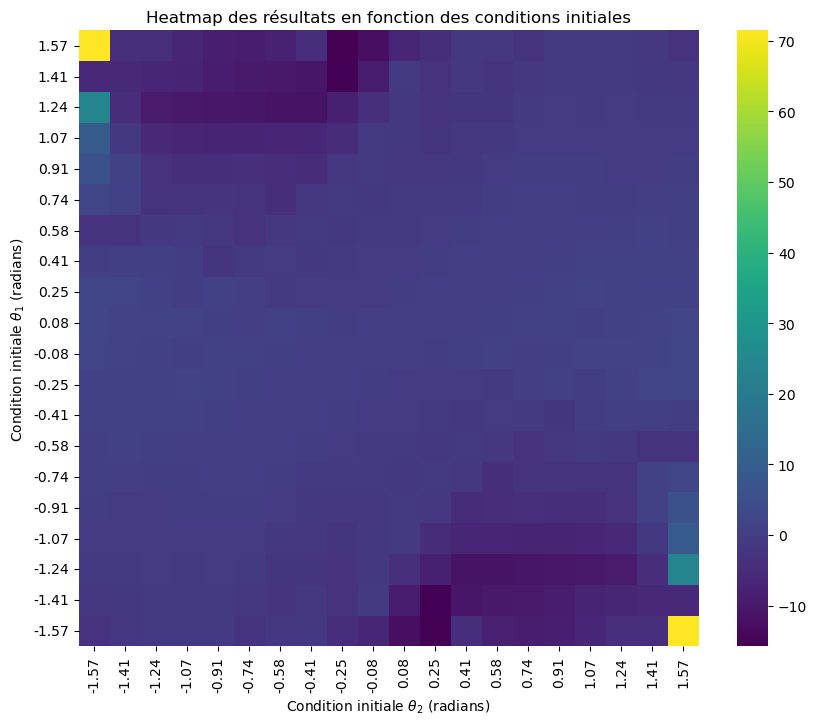

In [397]:
# Définir une plage de valeurs pour les conditions initiales
theta1_vals = np.linspace(-np.pi/2,  np.pi/2, 20)
theta2_vals = np.linspace(-np.pi/2,  np.pi/2, 20)

def calcul_erreur_relative(theta10, theta20, tf, dt):
   omega10 = 0
   omega20 = 0
   Ninc = int(tf/dt) 
   x0 = np.array([theta10,theta20, omega10, omega20]) 
   t_balayage = np.linspace(t0, tf, Ninc)  #avec t_balayage2 = np.arange(t0, tf, dt) on n'atteint pas tf .. 

   solution_ivp_ga_bis=solve_ivp(pendule_double_ivp_ga, [t0,tf], x0, method='RK45', args = (l1, l2, g, m1,m2), t_eval=t_balayage, rtol=1e-9, atol=1e-9)
   solution_ivp_ga=np.array([solution_ivp_ga_bis.y[0], solution_ivp_ga_bis.y[1], solution_ivp_ga_bis.y[2], solution_ivp_ga_bis.y[3]])
   solution_newmark_ga = NewmarkNewtonRaphson_ga(m1,m2,l1,l2,g,x0,dt,Ninc)

   erreur = (norm(solution_ivp_ga[0:2,:], axis = 0) - norm(solution_newmark_ga[0:2,:], axis = 0))/np.max(norm(solution_newmark_ga[0:2,:], axis = 0)) 
   erreur_moy = np.mean(erreur)*100

   if erreur_moy>100:
       erreur_moy = 100

   return erreur_moy

# Initialiser un tableau pour stocker les résultats
results = np.zeros((len(theta1_vals), len(theta2_vals)))

tf = 5 #temps final = s
dt = 0.01 #pas temporel

# Remplir le tableau avec les résultats des calculs
for i, theta10 in enumerate(theta1_vals):
    for j, theta20 in enumerate(-theta2_vals):
        results[i, j] = calcul_erreur_relative(theta10, theta20, tf, dt)

plt.figure(figsize=(10, 8))
sns.heatmap(results, xticklabels=np.round(theta2_vals, 2), yticklabels=-np.round(theta1_vals, 2), cmap='viridis')
plt.xlabel('Condition initiale $\\theta_2$ (radians)')
plt.ylabel('Condition initiale $\\theta_1$ (radians)')
plt.title('Heatmap des résultats en fonction des conditions initiales')
plt.show()

## 4.2 Détermination angle critique

In [ ]:
theta10 = np.radians(-45)                            #theta 1 initial (rad)
theta20 = np.radians(50)                            #theta 2 initial (rad)
omega10 = np.radians(-10)                              #omega 1 initial (rad/s)
omega20 = np.radians(35)                            #omega 2 initial (rad/s)
l1 = 3                                #longeur du premier bras (m)
l2 = 2                                #longeur du deuxième bras (m)
g = 9.81                                #Acceleration terrestre (m.s^-2)
tf = 20                                 #temps de la simulation (s)
dt = 0.005                               #Pas temporel (s)
Ninc = int(tf/dt)                       #nombre d'itération
m1 = 2
m2 = 3
mu = m2/m1

t0 = 0
x0 = np.array([theta10,theta20, omega10, omega20]) 
t_balayage = np.linspace(t0, tf, Ninc)  #avec t_balayage2 = np.arange(t0, tf, dt) on n'atteint pas tf .. 

#### Heatmap en fonction des angles initiaux (sans vitesse initial, limité à 100%)

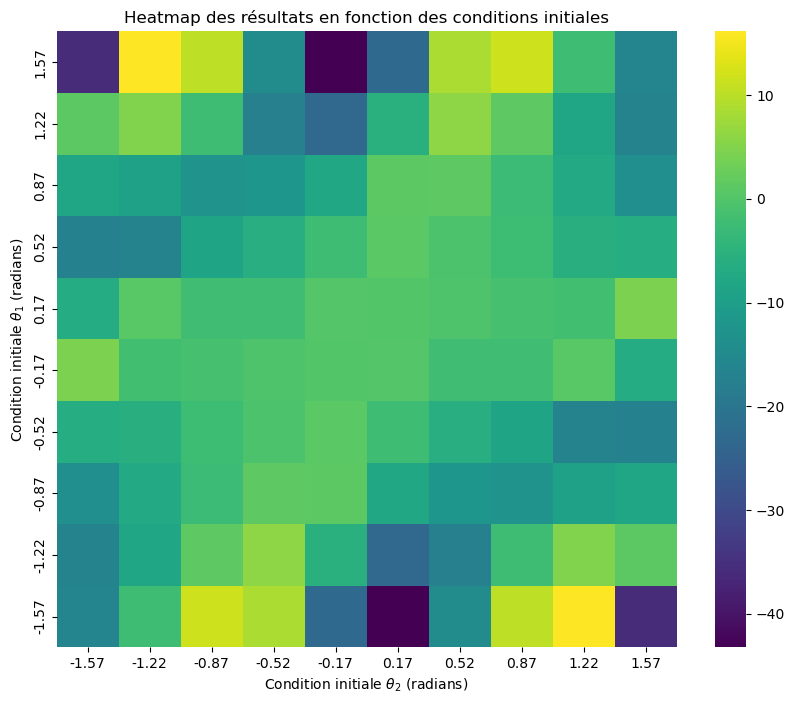

In [412]:
# Définir une plage de valeurs pour les conditions initiales
theta1_vals = np.linspace(-np.pi/2,  np.pi/2, 10)
theta2_vals = np.linspace(-np.pi/2,  np.pi/2, 10)

def calcul_erreur_relative(theta10, theta20, tf, dt):
   omega10 = 0
   omega20 = 0
   Ninc = int(tf/dt) 
   x0 = np.array([theta10,theta20,omega10,omega20])
   solution_pa = NewmarkNewtonRaphson_pa(m1,m2,l1,l2,g,x0,dt,Ninc)
   solution_ga = NewmarkNewtonRaphson_ga(m1,m2,l1,l2,g,x0,dt,Ninc)

   erreur = (norm(solution_pa[0:2,:], axis = 0) - norm(solution_ga[0:2,:], axis = 0))/np.max(norm(solution_ivp_ga[0:2,:], axis = 0)) 
   erreur_moy = np.mean(erreur)*100

   if erreur_moy>100:
       erreur_moy = 100

   return erreur_moy

# Initialiser un tableau pour stocker les résultats
results = np.zeros((len(theta1_vals), len(theta2_vals)))

tf = 3 #temps final = s
dt = 0.01 #pas temporel

# Remplir le tableau avec les résultats des calculs
for i, theta10 in enumerate(theta1_vals):
    for j, theta20 in enumerate(-theta2_vals):
        results[i, j] = calcul_erreur_relative(theta10, theta20, tf, dt)

plt.figure(figsize=(10, 8))
sns.heatmap(results, xticklabels=np.round(theta2_vals, 2), yticklabels=-np.round(theta1_vals, 2), cmap='viridis')
plt.xlabel('Condition initiale $\\theta_2$ (radians)')
plt.ylabel('Condition initiale $\\theta_1$ (radians)')
plt.title('Heatmap des résultats en fonction des conditions initiales')
plt.show()

In [ ]:
# Définir une plage de valeurs pour les conditions initiales
Ni=10
theta1_vals = np.linspace(-np.pi/2,  np.pi/2, 2*Ni)
theta2_vals = np.linspace(0,  np.pi/2, Ni)

def calcul_erreur_relative(theta10, theta20, tf, dt):
   omega10 = 0
   omega20 = 0
   Ninc = int(tf/dt) 
   x0 = np.array([theta10,theta20,omega10,omega20])
   solution_pa = NewmarkNewtonRaphson_pa(m1,m2,l1,l2,g,x0,dt,Ninc)
   solution_ga = NewmarkNewtonRaphson_ga(m1,m2,l1,l2,g,x0,dt,Ninc)

   erreur = (norm(solution_pa[0:2,:], axis = 0) - norm(solution_ga[0:2,:], axis = 0))/np.max(norm(solution_ivp_ga[0:2,:], axis = 0)) 
   erreur_moy = np.mean(erreur)*100

   if erreur_moy>100:
       erreur_moy = 100

   return erreur_moy

# Initialiser un tableau pour stocker les résultats
results = np.zeros((len(theta1_vals), len(theta2_vals)))

tf = 3 #temps final = s
dt = 0.01 #pas temporel

# Remplir le tableau avec les résultats des calculs
for i, theta10 in enumerate(theta1_vals):
    for j, theta20 in enumerate(-theta2_vals):
        results[i, j] = calcul_erreur_relative(theta10, theta20, tf, dt)

left = results[:, :Ni][:, ::-1]
extended_matrix_lr = np.concatenate((left, results), axis=1)



plt.figure(figsize=(10, 8))
sns.heatmap(extended_matrix_lr, xticklabels=np.round(theta2_vals, 2), yticklabels=-np.round(theta1_vals, 2), cmap='viridis')
plt.xlabel('Condition initiale $\\theta_2$ (radians)')
plt.ylabel('Condition initiale $\\theta_1$ (radians)')
plt.title('Heatmap des résultats en fonction des conditions initiales')
plt.show()